In [1]:
from DCLayers import *
from DCWidget import *
%matplotlib inline

# Computing Apparent Resistivity

TODO: explain this

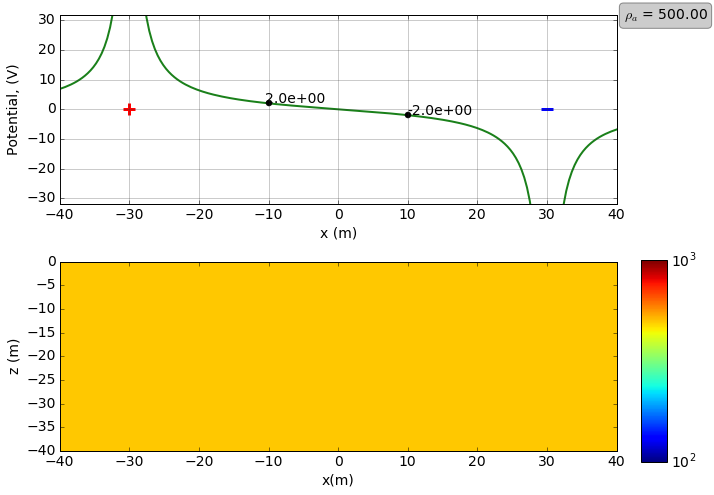

None

<function DCLayers.<lambda>>

In [5]:
app = plot_Layer_Potentials_app()
app

# Building Pseudosections 

TODO: explain this - these are midpoints, lay out each experiment type

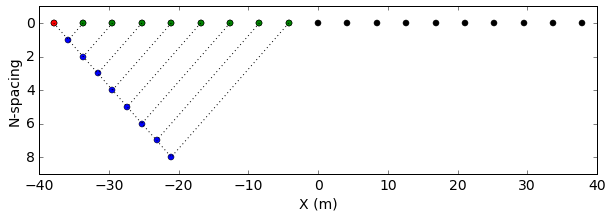

None

<function DCWidget.DipoleDipolefun>

In [6]:
MidpointPseudoSectionWidget()

# Inverting Data

TODO b

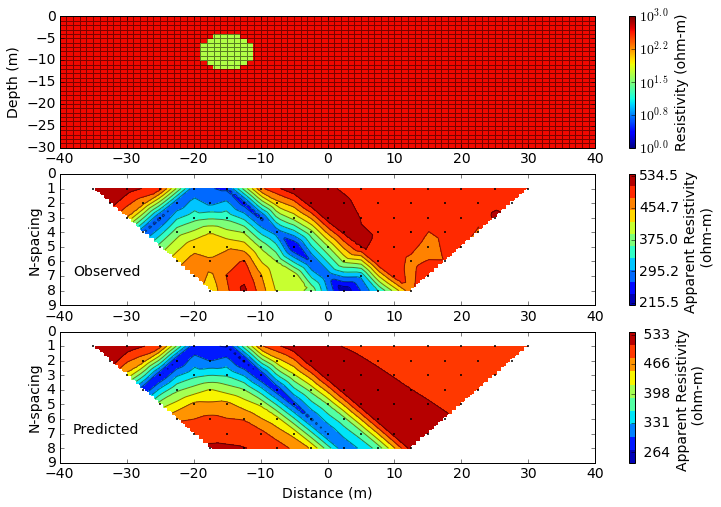

None

<function DCWidget.DC2DfwdWrapper>

In [4]:
app = DC2DfwdWidget()
app